In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import itertools
import random

# 二部グラフの最大マッチングに対する強双対性

In [2]:
# 考える二部グラフのデータ
setA = [1, 2, 3, 4, 5, 6]
setB = [7, 8, 9, 10, 11, 12]
edges = [(1,7), (1,8), (1,9), (2,9), (3,9), (3,10), (4,10), (4,11), (4,12), (5,10), (5,12), (6,11)]

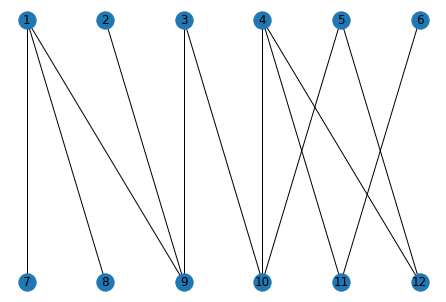

In [3]:
# 二部グラフの構成
G1 = nx.Graph()
G1.add_nodes_from(setA)
G1.add_nodes_from(setB)
G1.add_edges_from(edges)
mypos1 = {}
for i in range(0, len(setA)):
    mypos1[setA[i]] = (10*i, 20)
for i in range(0, len(setB)):
    mypos1[setB[i]] = (10*i, 10)
nx.draw(G1, pos = mypos1, with_labels=True)

In [4]:
# 最大マッチングの計算
m1 = nx.max_weight_matching(G1)
print(m1)

{(8, 1), (9, 2), (12, 4), (10, 3), (11, 6)}


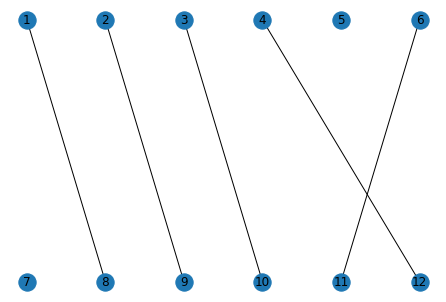

In [5]:
# 最大マッチングの描画
G1m = nx.Graph()
G1m.add_nodes_from(setA)
G1m.add_nodes_from(setB)
for e in m1:
    G1m.add_edge(*e)
nx.draw(G1m, pos = mypos1, with_labels=True)

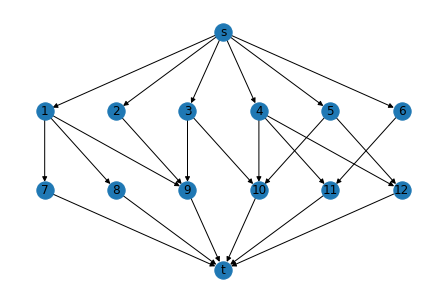

In [6]:
# 最小頂点被覆を計算するための準備：容量付き有向グラフの作成
G1f = nx.DiGraph()
G1f.add_nodes_from(setA)
G1f.add_nodes_from(setB)
G1f.add_nodes_from(['s', 't'])
for e in edges:
    G1f.add_edge(e[0], e[1], capacity=float("inf"))
for v in setA:
    G1f.add_edge('s', v, capacity=1)
for v in setB:
    G1f.add_edge(v, 't', capacity=1)
mypos1f = {}
for v in setA:
    mypos1f[v] = mypos1[v]
for v in setB:
    mypos1f[v] = mypos1[v]
mypos1f['s'] = ((len(setA)-1)*5, 30)
mypos1f['t'] = ((len(setB)-1)*5, 0)
nx.draw(G1f, pos = mypos1f, with_labels=True)

In [7]:
# 最小s,tカットの計算
c1 = nx.minimum_cut(G1f, 's', 't')
print(c1)

(5, ({2, 3, 4, 5, 6, 9, 10, 11, 12, 's'}, {8, 1, 't', 7}))


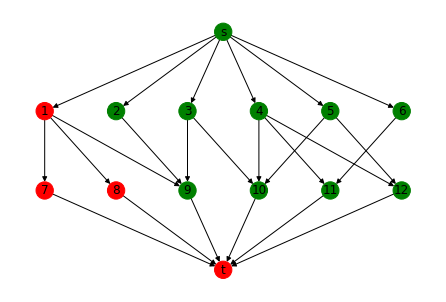

In [8]:
# 最小s,tカットの描画
nodecolor_c = list(map(lambda v: 'g' if v in c1[1][0] else 'r', G1f.nodes()))
nx.draw(G1f, pos = mypos1f, node_color = nodecolor_c, with_labels=True)

In [9]:
# 最小s,tカットを最小頂点被覆に変換
vc1 = (set(setA) - c1[1][0]) | (set(setB) & c1[1][0])
print(vc1)

{1, 9, 10, 11, 12}


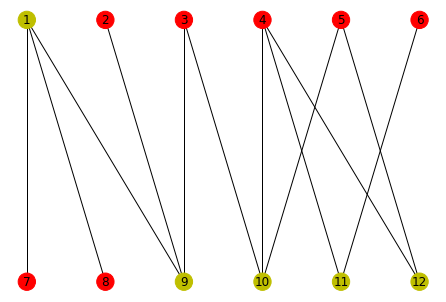

In [10]:
# 最小頂点被覆の描画
nodecolor_vc = list(map(lambda v: 'y' if v in vc1 else 'r', G1.nodes()))
nx.draw(G1, pos = mypos1, node_color = nodecolor_vc, with_labels=True)

# ドミノ・タイリング

In [11]:
board1 = [(0,0), (0,1), (0,2), (0,3), (0,4),
          (1,0), (1,1), (1,2), (1,3), (1,4),
          (2,0), (2,1), (2,2), (2,3), (2,4),
          (3,0), (3,1), (3,2), (3,3), (3,4),
          (4,0), (4,1), (4,2), (4,3), (4,4),
          (5,0), (5,1), (5,2), (5,3), (5,4)]

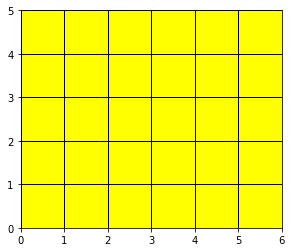

In [12]:
fig = plt.figure()
ax = plt.axes()
for s in board1:
    ax.add_patch(patches.Rectangle(xy=s, width=1, height=1, fc='yellow', ec='black'))
ax.set_aspect('equal')
ax.set_xlim(left=0, right=6)
ax.set_ylim(bottom=0, top=5)
plt.show()

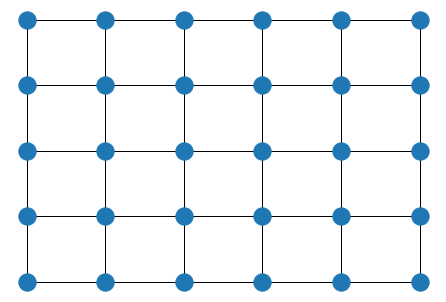

In [13]:
# 二部グラフの構成
G1 = nx.Graph()
G1.add_nodes_from(board1)
pos1 = {c: (c[0]+0.5, c[1]+0.5) for c in board1}
el = []
for c in board1:
    directions = [(+1,0), (-1,0), (0,+1), (0,-1)]
    for d in directions:
        if (c[0]+d[0], c[1]+d[1]) in board1:
            el.append((c,(c[0]+d[0], c[1]+d[1])))
G1.add_edges_from(el)
nx.draw(G1, pos=pos1)

In [14]:
M1 = nx.max_weight_matching(G1)
M1

{((0, 1), (1, 1)),
 ((0, 3), (1, 3)),
 ((1, 0), (0, 0)),
 ((1, 2), (0, 2)),
 ((1, 4), (0, 4)),
 ((2, 3), (3, 3)),
 ((3, 0), (2, 0)),
 ((3, 1), (2, 1)),
 ((3, 2), (2, 2)),
 ((3, 4), (2, 4)),
 ((4, 2), (5, 2)),
 ((4, 3), (5, 3)),
 ((5, 0), (4, 0)),
 ((5, 1), (4, 1)),
 ((5, 4), (4, 4))}

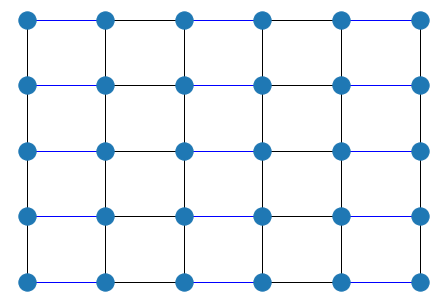

In [15]:
def edgecolor(graph, edgelist, color):
    return list(map(lambda e: color if e in edgelist or e[::-1] in edgelist else 'black', graph.edges()))
nx.draw(G1, pos=pos1, edge_color = edgecolor(G1, M1, 'blue'))

In [16]:
board2 = [(0,2), (0,3), (0,4),
          (1,2), (1,3), (1,4), (1,5),
          (2,1), (2,2), (2,4), (2,5),
          (3,0), (3,1), (3,2), (3,3), (3,4), (3,5),
          (4,0), (4,1), (4,2), (4,3), (4,4), 
          (5,0), (5,1), (5,2), (5,3), (5,4),
          (6,1), (6,2), (6,3)]

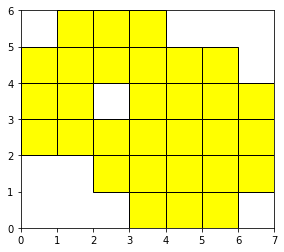

In [17]:
fig = plt.figure()
ax = plt.axes()
for s in board2:
    ax.add_patch(patches.Rectangle(xy=s, width=1, height=1, fc='yellow', ec='black'))
ax.set_aspect('equal')
ax.set_xlim(left=0, right=7)
ax.set_ylim(bottom=0, top=6)
plt.show()

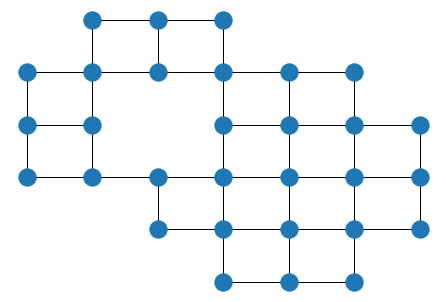

In [18]:
# 二部グラフの構成
G2 = nx.Graph()
G2.add_nodes_from(board2)
pos2 = {c: (c[0]+0.5, c[1]+0.5) for c in board2}
el = []
for c in board2:
    directions = [(+1,0), (-1,0), (0,+1), (0,-1)]
    for d in directions:
        if (c[0]+d[0], c[1]+d[1]) in board2:
            el.append((c,(c[0]+d[0], c[1]+d[1])))
G2.add_edges_from(el)
nx.draw(G2, pos=pos2)

# トランプ・マジック？

In [19]:
# 52枚のカードを作成 (ランダムにシャッフル)
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
suits = ['S', 'H', 'D', 'C']
cards = list(itertools.product(ranks, suits)) # itertools を import する
random.shuffle(cards) # random を import する

In [20]:
# 4枚ずつの組に分ける
groups = list(zip(*[iter(cards)]*4))

In [21]:
# 組分け結果の表示
for i in range(0,13):
    print(groups[i])

(('K', 'C'), ('9', 'D'), ('6', 'S'), ('10', 'C'))
(('2', 'H'), ('5', 'C'), ('4', 'D'), ('9', 'C'))
(('A', 'H'), ('2', 'C'), ('3', 'S'), ('9', 'H'))
(('5', 'D'), ('5', 'S'), ('K', 'H'), ('A', 'S'))
(('8', 'D'), ('K', 'S'), ('4', 'C'), ('A', 'D'))
(('J', 'C'), ('6', 'D'), ('10', 'H'), ('J', 'D'))
(('7', 'C'), ('9', 'S'), ('K', 'D'), ('3', 'H'))
(('Q', 'D'), ('8', 'S'), ('Q', 'C'), ('7', 'D'))
(('6', 'H'), ('8', 'H'), ('7', 'H'), ('Q', 'H'))
(('2', 'S'), ('3', 'C'), ('J', 'H'), ('Q', 'S'))
(('8', 'C'), ('7', 'S'), ('A', 'C'), ('4', 'H'))
(('4', 'S'), ('10', 'S'), ('10', 'D'), ('3', 'D'))
(('J', 'S'), ('2', 'D'), ('6', 'C'), ('5', 'H'))


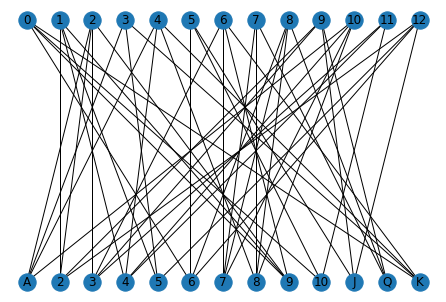

In [22]:
# 二部グラフの構成
G3 = nx.Graph()
G3.add_nodes_from(list(range(0,len(groups))))
G3.add_nodes_from(ranks)
for i in range(0,len(groups)):
    for c in groups[i]:
        G3.add_edge(i, c[0])
mypos3 = {}
for i in range(0, len(groups)):
    mypos3[i] = (10*i, 20)
for i in range(0, len(ranks)):
    mypos3[ranks[i]] = (10*i, 10)
nx.draw(G3, pos = mypos3, with_labels = True)

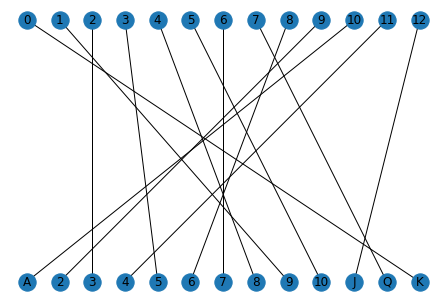

In [23]:
# 最大マッチングの計算と描画 (最大マッチングは完全マッチングになる)
m3 = nx.max_weight_matching(G3)
G3m = nx.Graph()
G3m.add_nodes_from(list(range(0,len(groups))))
G3m.add_nodes_from(ranks)
for e in m3:
    G3m.add_edge(*e)
nx.draw(G3m, pos = mypos3, with_labels=True)

In [24]:
# 完全マッチングによって選ばれたカードの表示
for e in G3m.edges():
    for c in groups[e[0]]:
        if c[0] == e[1]:
            print('{0} in {1}'.format(c, groups[e[0]]))
            break

('K', 'C') in (('K', 'C'), ('9', 'D'), ('6', 'S'), ('10', 'C'))
('9', 'C') in (('2', 'H'), ('5', 'C'), ('4', 'D'), ('9', 'C'))
('3', 'S') in (('A', 'H'), ('2', 'C'), ('3', 'S'), ('9', 'H'))
('5', 'D') in (('5', 'D'), ('5', 'S'), ('K', 'H'), ('A', 'S'))
('8', 'D') in (('8', 'D'), ('K', 'S'), ('4', 'C'), ('A', 'D'))
('10', 'H') in (('J', 'C'), ('6', 'D'), ('10', 'H'), ('J', 'D'))
('7', 'C') in (('7', 'C'), ('9', 'S'), ('K', 'D'), ('3', 'H'))
('Q', 'D') in (('Q', 'D'), ('8', 'S'), ('Q', 'C'), ('7', 'D'))
('6', 'H') in (('6', 'H'), ('8', 'H'), ('7', 'H'), ('Q', 'H'))
('2', 'S') in (('2', 'S'), ('3', 'C'), ('J', 'H'), ('Q', 'S'))
('A', 'C') in (('8', 'C'), ('7', 'S'), ('A', 'C'), ('4', 'H'))
('4', 'S') in (('4', 'S'), ('10', 'S'), ('10', 'D'), ('3', 'D'))
('J', 'S') in (('J', 'S'), ('2', 'D'), ('6', 'C'), ('5', 'H'))
